8 Feature Selection in the Diabetes Dataset

In [1]:
import pandas as pd

file_path = r'E:\data set\diabetes.csv'
diabetes = pd.read_csv(file_path)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Correlation Analysis

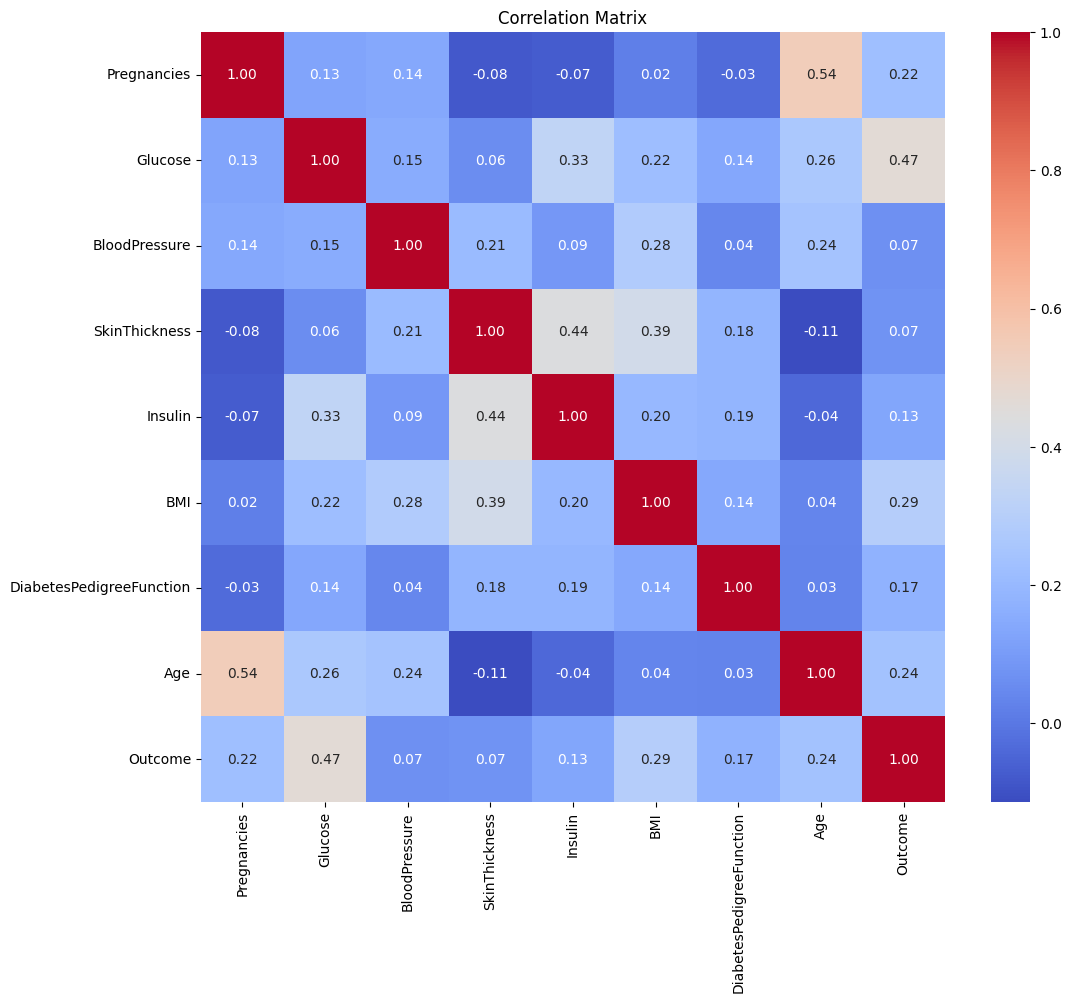

Feature correlations with target:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = diabetes.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Identify features with high correlation with the target variable
target = 'Outcome'  
correlations = correlation_matrix[target].sort_values(ascending=False)
print("Feature correlations with target:")
print(correlations)


 Recursive Feature Elimination (RFE)

Features ranking from RFE:
                    Feature  RFE Ranking
0               Pregnancies            1
1                   Glucose            1
6  DiabetesPedigreeFunction            1
5                       BMI            1
7                       Age            1
2             BloodPressure            2
3             SkinThickness            3
4                   Insulin            4


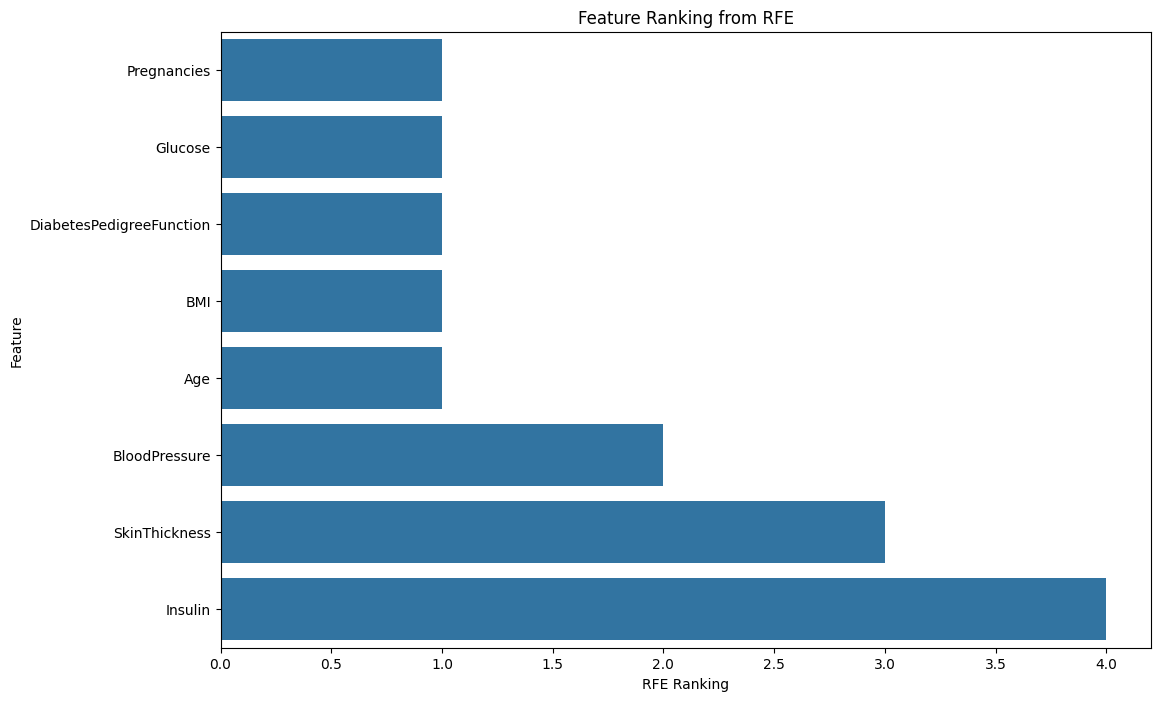

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = diabetes.drop(columns=[target])
y = diabetes[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Initialize RFE with the model and desired number of features
rfe = RFE(model, n_features_to_select=5)  # Adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Get feature ranking
ranking = rfe.ranking_
features = X.columns

# Create a DataFrame for better visualization
rfe_df = pd.DataFrame({'Feature': features, 'RFE Ranking': ranking})
rfe_df = rfe_df.sort_values(by='RFE Ranking')

print("Features ranking from RFE:")
print(rfe_df)

# Plot RFE rankings
plt.figure(figsize=(12, 8))
sns.barplot(x='RFE Ranking', y='Feature', data=rfe_df)
plt.title('Feature Ranking from RFE')
plt.show()
